In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
warnings.simplefilter("ignore")

In [2]:
features = list()
with open(r"C:\Users\vijayakumar_p\.spyder-py3\Vijay Learning Projects\pamosys\Data\Features.txt") as f:
    for line in f:
        features.append(line.split()[1])

In [4]:
train_df = pd.read_csv(r"C:\Users\vijayakumar_p\.spyder-py3\Vijay Learning Projects\pamosys\Data\train\X_train.txt", delim_whitespace = True)
train_df.columns=features
train_df["subject_id"] = pd.read_csv(r"C:\Users\vijayakumar_p\.spyder-py3\Vijay Learning Projects\pamosys\Data\train\subject_train.txt", header = None, squeeze = True)
train_df["activity"] = pd.read_csv(r"C:\Users\vijayakumar_p\.spyder-py3\Vijay Learning Projects\pamosys\Data\train\y_train.txt", header = None, squeeze = True)
activity = pd.read_csv(r"C:\Users\vijayakumar_p\.spyder-py3\Vijay Learning Projects\pamosys\Data\train\y_train.txt", header = None, squeeze = True)
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
train_df["activity_name"] = label_name
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


In [5]:
test_df = pd.read_csv(r"C:\Users\vijayakumar_p\.spyder-py3\Vijay Learning Projects\pamosys\Data\test\X_test.txt", delim_whitespace = True)
test_df.columns=features
test_df["subject_id"] = pd.read_csv(r"C:\Users\vijayakumar_p\.spyder-py3\Vijay Learning Projects\pamosys\Data\test\subject_test.txt", header = None, squeeze = True)
test_df["activity"] = pd.read_csv(r"C:\Users\vijayakumar_p\.spyder-py3\Vijay Learning Projects\pamosys\Data\test\y_test.txt", header = None, squeeze = True)
activity = pd.read_csv(r"C:\Users\vijayakumar_p\.spyder-py3\Vijay Learning Projects\pamosys\Data\test\y_test.txt", header = None, squeeze = True)
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
test_df["activity_name"] = label_name
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5,STANDING


In [11]:
x_train = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_train = train_df["activity"]
x_test = test_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_test = test_df["activity"]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7351, 561), (7351,), (2946, 561), (2946,))

In [12]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    print("-"*125)

In [13]:
def apply_model(cross_val, x_train, y_train, x_test, y_test, model_name):
    start = datetime.now()
    cross_val.fit(x_train, y_train)
    predicted_points = cross_val.predict(x_test)
    print("Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): {}\n".format(datetime.now() - start))
    accuracy = np.round(accuracy_score(y_test, predicted_points)*100, 2)
    print('Accuracy '+str(accuracy)+"%\n")
    print_confusionMatrix(y_test, predicted_points)

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:05:04.878746

Accuracy 92.6%



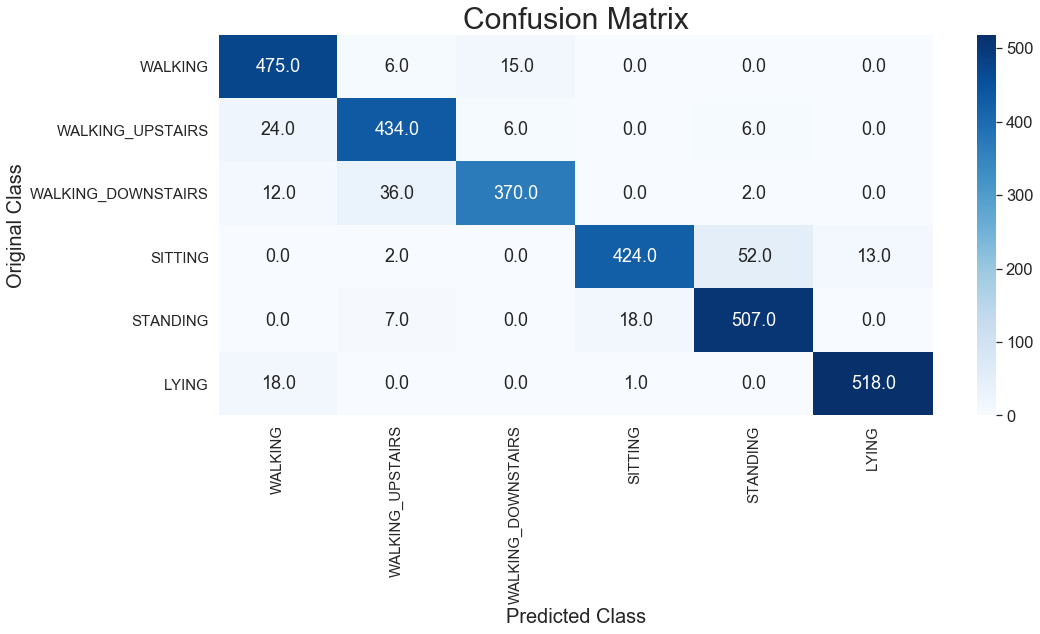

-----------------------------------------------------------------------------------------------------------------------------


In [14]:
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
clf = SVC()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "RBF SVM")

def predict_delay(input):
    input = [{'col1': value1,
              'col2': value2,
              'col3': value3}]
    return model.predict(pd.DataFrame(input))[0][0]